# Radial Basis Functions

---

### Author: Marin lauber

In [2]:
import numpy as np
import matplotlib.pyplot as plt
try:
    plt.style.use("jupyter")
except OSError:
    print("Using default ploting style")

[Radial Basis Functions](https://en.wikipedia.org/wiki/Radial_basis_function_interpolation)

In [3]:
xe = np.linspace(0, 1, 1000)

In [4]:
def f(x): return np.exp(x * np.cos(3 * x * np.pi))-1

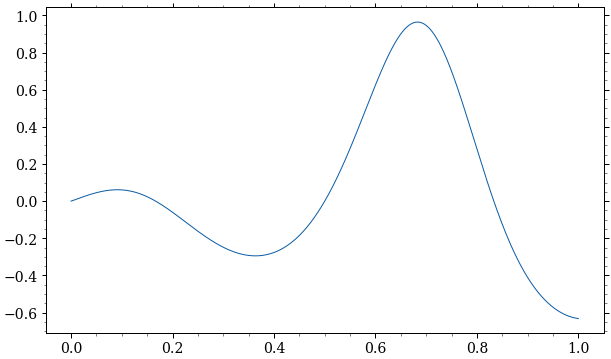

In [5]:
plt.plot(xe, f(xe));

Radial basis functions are susually used to construct a function approximation $s(\bf{x})$ to the actual function $f(\bf{x})$

$$
    s(\bf{x}) = \sum_{i=1}^{N}w_i\varphi(\Vert\bf{x - x}_i\Vert) \approx f(\bf{x})
$$

where the radial basis function $\varphi : [0, \infty) \to \mathbb{R}$.

In [6]:
def RBF(f, x, phi, N=16):
    
    if not callable(f) or not callable(phi):
        print("f() and phi() must be callable functions")
    
    x = np.linspace(x[0], x[-1], N)
    
    # form matrix
    W = phi(np.abs(np.array([x for _ in range(N)]) - x[:, np.newaxis]))
    
    # ṣolve, matrix is not Toeplitz circulant
    s = np.linalg.solve(W, f(x))

    return x, np.dot(W, s)

Gaussian radial basis function

$$
    \varphi(r) = \exp(-(\epsilon r)^2)
$$

with $\epsilon=3.05048$ and $r:= \Vert x - y\Vert$. A good aproximation for $\epsilon$ is often the nodal distance.

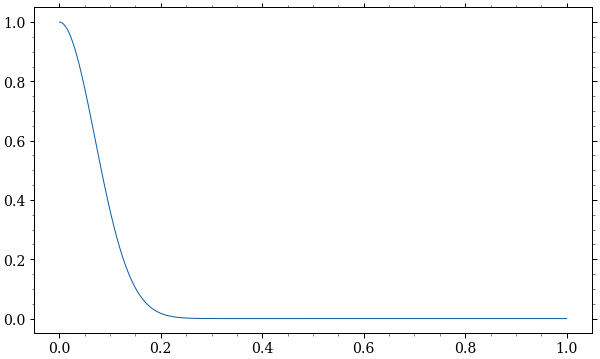

In [7]:
Gaussian = lambda r : np.exp(-(10.05048 * r)**2)
plt.plot(xe, Gaussian(xe));

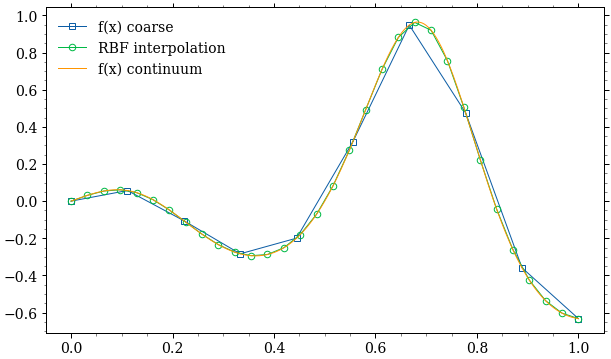

In [9]:
xe = np.linspace(0, 1, 10)
x, s = RBF(f, xe, Gaussian, N=32)
xf = np.linspace(0, 1, 1000)
plt.plot(xe, f(xe), '-s', label="f(x) coarse")
plt.plot(x, s, '-o', label="RBF interpolation")
plt.plot(xf, f(xf), label="f(x) continuum")
plt.legend();

Multiquadratic

$$
    \varphi(r) = \sqrt{(\epsilon r)^2+1}
$$

Inverse

$$
    \varphi(r) = \frac{1}{\sqrt{(\epsilon r)^2+1}}
$$

Linear

$$
    \varphi(r) = r
$$

Cubic

$$
    \varphi(r) = r^3
$$

Quintic

$$
    \varphi(r) = r^5
$$

Thin plate

$$
    \varphi(r) = r^2\log(r)
$$

In [10]:
Multiquadratic = lambda r, epsilon=3.9786 : np.sqrt((epsilon * r)**2 +1)

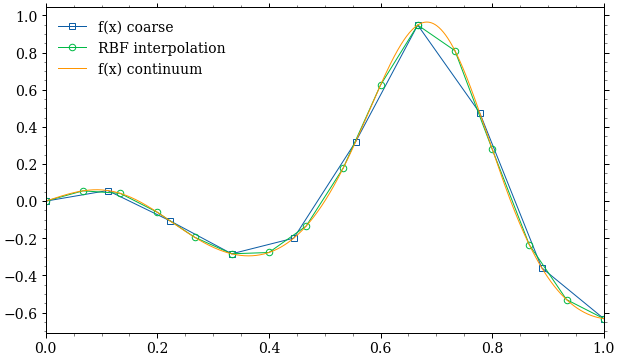

In [11]:
x, s = RBF(f, xe, Multiquadratic, N=16)
xf = np.linspace(0, 1, 1000)
plt.plot(xe, f(xe), '-s', label="f(x) coarse")
plt.plot(x, s, '-o', label="RBF interpolation")
plt.plot(xf, f(xf), label="f(x) continuum")
plt.legend(); plt.xlim(x[0], x[-1]);

This is all good, but in the case where the operator $f(\bf{x})$ is expansive to evaluate, the interpolation can become cumbersone to evaluate. What can we do for this?